# 연습문제
## 전화번호 찾는 예제


* 핸드폰 번호만 찾음

In [39]:
import re
reg_cellphone=r"\d{3}[-_ .*]\d{4}[-_ .*]\d{4}"
text="6432-34613-234001 OO은행 010-5555-5555 064-551-3555 010-6666-6666 010-4774-8888 02-222-2222"
result=re.findall(reg_cellphone,text)
result

['010-5555-5555', '010-6666-6666', '010-4774-8888']

* 일반 전화번호 찾음

In [40]:
reg_phone=r"\d{2,3}[-_ .*]\d{3,4}[-_ .*]\d{4}"
result=re.findall(reg_phone,text)
result

['010-5555-5555',
 '064-551-3555',
 '010-6666-6666',
 '010-4774-8888',
 '02-222-2222']

## E-Mail 찾는 정규표현식

In [48]:
text="6432-34613-234001 OO은행 010-5555-5555 064-551-3555 010-6666-6666 asdf@hanmail.net 1ad-ddsa@naver.com"
reg_email=r'[0-9a-zA-Z]([-_.]?[0-9a-zA-Z])*@.+\..+'
result=re.search(reg_email,text)
result

<re.Match object; span=(64, 99), match='asdf@hanmail.net 1ad-ddsa@naver.com'>

## URL 찾는 정규표현식

In [60]:
reg_url=r'(http|https)://(\w+)(\w+|\.|\-|/)+(:[0-9]+)?' # (http|https)://[\w\.\-/]+
text="6432-34613-234001 OO은행 010-5555-5555 064-551-3555 http://ldaelab.co.kr:80 010-6666-6666 asdf@hanmail.net 1ad-ddsa@naver.com"
result=re.search(reg_url,text)
result

<re.Match object; span=(50, 73), match='http://ldaelab.co.kr:80'>

In [63]:
print(f'protocol: {result.group(1)}')
print(f'host: {result.group(2)}')
print(f'port: {result.group(4)[1:]}') # : 제거하기위한 슬라이싱

protocol: http
host: ldaelab
port: 80


## 패턴 검사하는 정규표현식
* 자리수 8자리
* 1-9로 시작
* 두번째~다섯번째는 1010
* 여섯번째,일곱번째는 0~5
* 여덟번째 숫자는 0
* ex) 71010330은 OK, 98101033은 NO

In [66]:
reg_pattern=r'^[1-9]1010[0-5]{2}0$'
text="71010330"
result=re.findall(reg_pattern,text)
if result:
    print("OK")
else:
    print("NG")

NG


## 소설내 텍스트 분석
* 소설 : 위대한 개츠비


In [104]:
import requests
url="http://www.gutenberg.org/files/64317/64317-0.txt"
response=requests.get(url)
response.encoding='utf-8'
text=response.text

In [105]:
len(text)

296704

In [73]:
# 숫자 개수
reg_text= r'[0-9]'
result_num=re.findall(reg_text,text)
len(result_num)

232

In [76]:
# 소문자 개수
reg_text= r'[a-z]'
result_lower=re.findall(reg_text,text)
len(result_lower)

214107

In [77]:
# 대문자 개수
reg_text= r'[A-Z]'
result_Upper=re.findall(reg_text,text)
len(result_Upper)

7714

In [78]:
# 특수 문자 개수
reg_text=r'[\{\}\[\]\/?.,;:|\)*~`!^\-_+<>@|#$%&\\\=\(\'\"]'
result_special=re.findall(reg_text,text)
len(result_special)

9302

### 결과 시각화

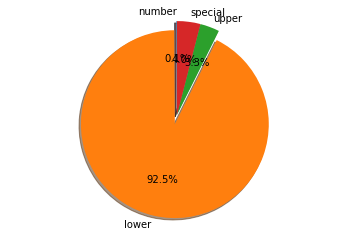

In [80]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = 'number', 'lower', 'upper', 'special'
sizes = [len(result_num), len(result_lower), len(result_Upper), len(result_special)]
explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 약자 만들기 (간단하지만 활용빈도 높음)
* ORM, NASA, CS등 약자를 만드는 프로그램을 작성하시오
* 예시 
    * 입력 : Object Relational Mapping , 출력 : ORM

In [83]:
reg_upper=r'[A-Z]'
result= re.findall(reg_upper,"Object Relational Mapping")
"".join(result)

'ORM'

## 주사위 문제 (규칙+ 계산)

주사위#1 : 1~6 주사위#2 : A,B,C,D,! (각각 2배,3배,4배,5배,지금까지 합의 제곱)
* ex1 : 2A3A4! = ( (2 x 2)+ (3 x 2) + (4) )^2 = 14^2 = 196
* ex2 : 6!2C2C =  (6^2)+ (2 x 4) + (2 x 4) = 36+8+8 =52


In [101]:
reg=r'([1-6])([A-D!]?)'
result=re.findall(reg,"2!2!2!")
result

[('2', '!'), ('2', '!'), ('2', '!')]

In [102]:
score =[]
for i,j in result:
    if j=="A":
        score.append(int(i)*2)
    elif j=="B":
        score.append(int(i)*3)
    elif j=="C":
        score.append(int(i)*4)
    elif j=="D":
        score.append(int(i)*5)
    elif j=="!":
        score.append(int(i))
        score=[sum(score)**2]
    else:
        score.append(int(i))

print(score)
print(sum(score))
        

[1444]
1444
